# SVC using Bayesian Optimization

In [1]:
import pandas as pd
from sklearn import svm
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
import time

# Standardize the data
from sklearn.preprocessing import StandardScaler
# Modeling 
from sklearn.svm import SVC
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit ,cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [29]:
import os
notebook_path = os.path.abspath("svm.ipynb")
Train= ['NWT', 'WT']
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
#datadir='/content/drive/MyDrive/USHE-S-22/WT-NWT/train'
datadir= os.path.join(os.path.dirname(notebook_path), "/Users/jordanmiller/Documents/Projects/dsc/dsc_dataset/train")

In [30]:
for i in Train:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img), as_gray=False)
    img_resized=resize(img_array,(135,85))
    flat_data_arr.append(img_array.flatten())
    target_arr.append(Train.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : NWT
loaded category:NWT successfully
loading... category : WT
loaded category:WT successfully


,0,1,2,3,4,5,6,7,8,9,...,34416,34417,34418,34419,34420,34421,34422,34423,34424,Target
0,48,53,47,66,71,64,49,55,45,34,...,11,12,16,11,12,16,14,15,20,0
1,137,163,128,140,166,131,137,163,128,134,...,116,163,93,118,165,93,127,173,101,0
2,208,214,226,208,214,226,209,215,227,209,...,63,58,28,71,64,38,71,63,44,0
3,90,115,94,69,91,78,97,111,111,105,...,181,178,185,135,130,137,136,129,136,0
4,133,169,133,100,135,102,69,100,69,69,...,133,179,106,130,176,103,132,175,103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,8,22,0,12,24,0,31,40,19,38,...,191,190,188,193,192,190,195,194,192,1
796,109,131,48,123,144,65,98,118,49,67,...,226,150,154,222,146,148,220,148,149,1
797,34,65,8,38,70,5,51,85,1,72,...,254,253,249,255,254,250,254,253,249,1
798,255,255,255,255,255,255,255,255,255,255,...,68,94,49,68,93,51,73,96,54,1


In [31]:
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [32]:
Test= ['NWT','WT']
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir2=os.path.join(os.path.dirname(notebook_path), "/Users/jordanmiller/Documents/Projects/dsc/dsc_dataset/test")

In [33]:
for i in Test:
  print(f'loading... category : {i}')
  path=os.path.join(datadir2,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img), as_gray=False)
    img_resized=resize(img_array,(135,85))
    flat_data_arr.append(img_array.flatten())
    target_arr.append(Train.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df2=pd.DataFrame(flat_data)
df2['Target']=target
df2

loading... category : NWT
loaded category:NWT successfully
loading... category : WT
loaded category:WT successfully


,0,1,2,3,4,5,6,7,8,9,...,34416,34417,34418,34419,34420,34421,34422,34423,34424,Target
0,43,116,193,44,115,195,47,115,198,47,...,158,148,139,157,147,138,146,136,127,0
1,99,100,120,100,101,121,100,103,122,99,...,11,13,8,11,13,8,10,12,7,0
2,195,210,243,193,208,241,193,206,238,194,...,112,124,150,109,121,147,102,112,137,0
3,46,111,191,46,111,191,45,112,191,45,...,33,32,37,44,44,46,59,59,61,0
4,39,103,175,39,103,175,39,103,175,39,...,144,64,53,147,54,46,146,53,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,75,76,60,62,69,51,67,82,59,61,...,16,14,15,12,10,11,14,12,13,1
196,93,133,70,99,140,74,100,139,74,97,...,214,213,208,208,208,200,214,214,206,1
197,73,78,97,122,128,144,153,159,175,169,...,103,90,74,102,89,73,102,89,73,1
198,140,187,255,147,194,255,135,184,251,141,...,118,137,81,116,135,80,136,154,112,1


In [34]:
x_test=df2.iloc[:,:-1]
y_test=df2.iloc[:,-1]
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Split Successfully')

Split Successfully


**Standardization**

In [35]:
#Initiate scaler
sc = StandardScaler()

#Standardize the training dataset
x_train_t = pd.DataFrame(sc.fit_transform(x_train),index=x_train.index, columns=x_train.columns)

#Standardize the testing dataset
x_test_t = pd.DataFrame(sc.fit_transform(x_test),index=x_test.index, columns=x_test.columns)

In [36]:
x_train_t

,0,1,2,3,4,5,6,7,8,9,...,34415,34416,34417,34418,34419,34420,34421,34422,34423,34424
0,-0.999422,-1.246837,-1.056065,-0.762702,-0.998917,-0.865991,-0.984451,-1.212681,-1.086234,-1.183441,...,-1.390361,-1.890704,-2.139154,-1.489373,-1.878944,-2.129831,-1.480284,-1.824109,-2.068572,-1.414852
1,0.134186,0.228710,-0.165868,0.183880,0.278901,-0.125969,0.140417,0.235176,-0.168520,0.101372,...,-0.476745,-0.207620,0.434418,-0.289334,-0.168251,0.468249,-0.282036,-0.021200,0.607711,-0.155617
2,1.038525,0.912827,0.911161,1.053712,0.924535,0.923315,1.060763,0.932293,0.926104,1.064982,...,-1.220026,-1.057177,-1.355152,-1.302354,-0.919677,-1.246824,-1.137927,-0.914677,-1.255524,-1.041745
3,-0.464461,-0.415165,-0.539531,-0.724327,-0.729903,-0.711360,-0.370887,-0.461940,-0.356485,-0.271224,...,1.520823,0.834289,0.690071,1.144479,0.103541,-0.126083,0.402677,0.122394,-0.137583,0.388497
4,0.083237,0.309194,-0.110917,-0.327786,-0.138072,-0.446277,-0.728799,-0.609407,-0.820871,-0.733757,...,-0.213500,0.064879,0.707115,-0.086730,0.023602,0.655039,-0.126419,0.058575,0.641588,-0.124524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.508909,-1.662673,-1.572599,-1.453451,-1.631101,-1.572878,-1.214538,-1.413773,-1.373711,-1.132049,...,1.133697,0.994582,0.894593,1.191234,1.030832,0.926734,1.227445,1.063736,0.963419,1.259080
796,-0.222455,-0.200540,-1.045075,-0.033578,-0.017015,-0.854946,-0.358104,-0.368098,-1.042007,-0.759453,...,0.669146,1.555610,0.212852,0.661346,1.494478,0.145611,0.573856,1.462610,0.184249,0.590597
797,-1.177742,-1.085868,-1.484679,-1.120868,-1.012368,-1.517652,-0.958886,-0.810499,-1.572734,-0.695212,...,2.109253,2.004433,1.968335,2.141914,2.022075,1.979550,2.161145,2.005078,1.962791,2.145209
798,1.637172,1.462804,1.229874,1.654919,1.476014,1.243623,1.648762,1.468537,1.235695,1.655996,...,-0.987751,-0.977030,-0.741585,-0.975071,-0.967641,-0.754377,-0.935625,-0.882767,-0.696553,-0.886284


In [37]:
x_test_t

,0,1,2,3,4,5,6,7,8,9,...,34415,34416,34417,34418,34419,34420,34421,34422,34423,34424
0,-0.763927,-0.109711,0.574833,-0.747505,-0.126480,0.600828,-0.687460,-0.111639,0.638318,-0.694668,...,0.589302,0.493098,0.386411,0.441679,0.477075,0.368823,0.431651,0.317544,0.201264,0.271636
1,0.149491,-0.386150,-0.298119,0.171592,-0.370380,-0.282655,0.181394,-0.319179,-0.265748,0.179340,...,-1.276321,-1.426284,-1.522315,-1.284194,-1.424193,-1.515008,-1.275779,-1.445508,-1.533049,-1.306498
2,1.715349,1.514364,1.172746,1.697950,1.493716,1.150019,1.705986,1.462205,1.114143,1.776084,...,0.719765,-0.107525,0.047082,0.586599,-0.147999,0.003304,0.549858,-0.252855,-0.134409,0.403147
3,-0.714994,-0.196098,0.550917,-0.714680,-0.196166,0.553072,-0.720247,-0.163524,0.555049,-0.728284,...,-0.767515,-1.139029,-1.253680,-0.902131,-0.994455,-1.079196,-0.776684,-0.810291,-0.875688,-0.596337
4,-0.829171,-0.334318,0.359585,-0.829567,-0.335537,0.362049,-0.818608,-0.319179,0.364719,-0.829131,...,-0.415264,0.310300,-0.801241,-0.691337,0.346851,-0.938612,-0.776684,0.317544,-0.959607,-0.806755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.241974,-0.800808,-1.015614,-0.452081,-0.927867,-1.118381,-0.359591,-0.682374,-1.015171,-0.459358,...,-1.237182,-1.360999,-1.508177,-1.191972,-1.411171,-1.557183,-1.236376,-1.393654,-1.533049,-1.227591
196,0.051624,0.184004,-0.896032,0.155180,0.309057,-0.843785,0.181394,0.303441,-0.836737,0.145724,...,1.306849,1.224292,1.305427,1.350726,1.141217,1.226388,1.245964,1.199070,1.292203,1.310574
197,-0.274596,-0.766253,-0.573159,0.532666,0.099999,-0.008059,1.050247,0.649340,0.364719,1.355888,...,-0.402218,-0.225038,-0.433634,-0.414671,-0.239156,-0.446566,-0.422064,-0.252855,-0.456097,-0.438524
198,0.818243,1.116984,1.316245,0.942977,1.249816,1.317164,0.755165,1.081715,1.268785,0.885269,...,-0.219569,-0.029182,0.230885,-0.322448,-0.056843,0.200122,-0.330125,0.187908,0.453019,0.074370


In [12]:
# x_train = x_train.sample(120)
# x_test = x_test.sample(30)

# y_train = y_train.sample(120)
# y_test =y_test.sample(30)


**Default Hyperparameters**

In [12]:
# Check default values
svc= SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df

,C,break_ties,cache_size,class_weight,coef0,decision_function_shape,degree,gamma,kernel,max_iter,probability,random_state,shrinking,tol,verbose
0,1.0,False,200,None,0.0,ovr,3,scale,rbf,-1,False,None,True,0.001,False


In [38]:
# Run model
ts = time.perf_counter()
svc.fit(x_train_t, y_train)
# Accuracy score
# print(f'The accuracy score of the training dataset with default hyperparameters is {svc.score(x_train_t, y_train):.4f}')

# Accuracy score
print(f'The accuracy score of the testing dataset with default hyperparameters is {svc.score(x_test_t, y_test):.4f}')
te = time.perf_counter()
print(te-ts)

The accuracy score of the testing dataset with default hyperparameters is 0.8600
11.408319832989946


**Bayesian Optimization**

In [41]:
# List of C values
C_range = [.1, 1, 10, 50, 100]
#print(f'The list of values for C are {C_range}')
# List of gamma values
#gamma_range = list(np.arange(0,100,.05))
gamma_range = 'auto', 'scale'
#print(f'The list of values for gamma are {gamma_range}')

In [42]:
# Space
space = {
    'C' : hp.choice('C', C_range),
    'gamma' : hp.choice('gamma', gamma_range),
    'kernel' : 'rbf'
}
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# Objective function
def objective(params):
   
    svc = SVC(**params)
    scores = cross_val_score(svc, x_train_t, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)
    # Extract the best score
    best_score = max(scores)
    # Loss must be minimized
    loss = - best_score
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
# Trials to track progress
bayes_trials = Trials()
# Optimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 5, trials = bayes_trials)

100%|██████████| 5/5 [01:01<00:00, 12.37s/trial, best loss: -0.975]


In [43]:
# Train model using the best parameters
svc_bo = SVC(C=space_eval(space, best)['C'], gamma=space_eval(space, best)['gamma'], kernel=space_eval(space, best)['kernel'], probability=True).fit(x_train_t,y_train)
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {space_eval(space, best)}')

# Print the best accuracy score for the testing dataset
preds = svc_bo.predict(x_test_t)
jd = accuracy_score(y_test, preds)
print(f'The accuracy score for the testing dataset using Bayesian Optimization is {jd}')

The best hyperparameters are {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
The accuracy score for the testing dataset using Bayesian Optimization is 0.88


In [45]:
pickle.dump(svc_bo,open('svc_bo','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


In [54]:
import ssl
import certifi
import requests
from skimage import io
from io import BytesIO
#print(certifi.where())
def create_ssl_context():
    return ssl.create_default_context(cafile='/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/certifi/cacert.pem')

ssl._create_default_https_context = create_ssl_context


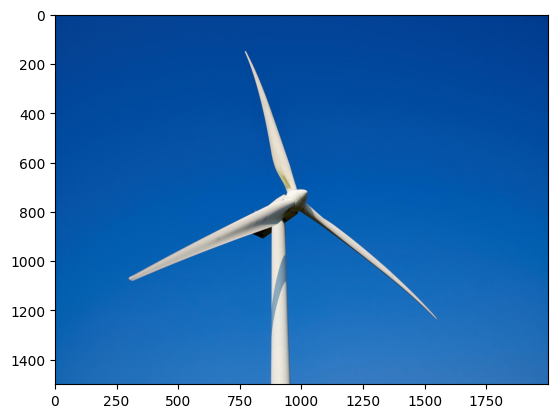

WT = 98.99681028487109%
NWT = 1.0031897151289217%
The predicted image is : WT
Is the image a WT ?(y/n)
Thank you for your feedback


In [56]:
model=pickle.load(open('svc_bo','rb'))
Categories = ['WT','NWT']
url=input('Enter URL of Image')
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
img = io.imread(BytesIO(response.content), as_gray=False)
plt.imshow(img)
plt.show()
img_resize=resize(img,(135,85))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")
if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly','sigmoid','linear']}
  model1=GridSearchCV(svc_bo,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.params:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")